## Import  the libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

## Import data Visualization library

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import the dataset

In [4]:
student_certification=pd.read_excel('student_dataset.xlsx')
student_certification

,S.NO,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT,TOTAL,CERTIFICATE
0,1,20,38,25,83,DISTINCTION
1,2,15,25,0,40,COMPLETION
2,3,20,31,25,76,FIRST CLASS
3,4,20,25,25,70,FIRST CLASS
4,5,20,17,15,52,FIRST CLASS
...,...,...,...,...,...,...
362,363,15,0,10,25,PARTICIPATION
363,364,20,9,25,54,COMPLETION
364,365,15,20,25,60,FIRST CLASS
365,366,15,0,10,25,PARTICIPATION


## Slicing the dataset

In [5]:
student_certification.columns

Index(['S.NO', 'ATTENDANCE', 'THEORY EXAM', 'DAILY ASSESSMENT', 'TOTAL',
       'CERTIFICATE'],
      dtype='object')

In [6]:
student_certification=student_certification.drop(['S.NO','TOTAL'],axis=1)
student_certification

,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT,CERTIFICATE
0,20,38,25,DISTINCTION
1,15,25,0,COMPLETION
2,20,31,25,FIRST CLASS
3,20,25,25,FIRST CLASS
4,20,17,15,FIRST CLASS
...,...,...,...,...
362,15,0,10,PARTICIPATION
363,20,9,25,COMPLETION
364,15,20,25,FIRST CLASS
365,15,0,10,PARTICIPATION


## Information regarding the dataset

In [7]:
student_certification['CERTIFICATE'].unique()

array(['DISTINCTION', 'COMPLETION', 'FIRST CLASS', 'PARTICIPATION'],
      dtype=object)

In [8]:
student_certification.shape

(367, 4)

In [9]:
student_certification.groupby('CERTIFICATE').size()

CERTIFICATE
COMPLETION       117
DISTINCTION       32
FIRST CLASS       67
PARTICIPATION    151
dtype: int64

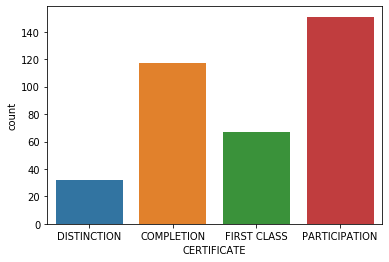

In [10]:
sns.countplot(student_certification['CERTIFICATE'],label='count')

In [11]:
student_certification

,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT,CERTIFICATE
0,20,38,25,DISTINCTION
1,15,25,0,COMPLETION
2,20,31,25,FIRST CLASS
3,20,25,25,FIRST CLASS
4,20,17,15,FIRST CLASS
...,...,...,...,...
362,15,0,10,PARTICIPATION
363,20,9,25,COMPLETION
364,15,20,25,FIRST CLASS
365,15,0,10,PARTICIPATION


## Segregating the dataset

In [12]:
y=student_certification.iloc[:,-1].values.reshape(-1,1)

In [13]:
y.shape

(367, 1)

In [14]:
y

array([['DISTINCTION'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['PARTICIPATION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['FIRST CLASS'],
       ['PARTICIPATION'],
       ['DISTINCTION'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['PARTICIPATION'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['DISTINCTION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['COMPLETION'],
  

In [15]:
x=student_certification.drop(['CERTIFICATE'],axis=1)

In [16]:
x.shape

(367, 3)

In [17]:
x

,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT
0,20,38,25
1,15,25,0
2,20,31,25
3,20,25,25
4,20,17,15
...,...,...,...
362,15,0,10
363,20,9,25
364,15,20,25
365,15,0,10


## Divide the dataset into Training and Testing sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)

In [20]:
x_train.shape

(275, 3)

In [21]:
x_test.shape

(92, 3)

In [22]:
y_train.shape

(275, 1)

In [23]:
y_test.shape

(92, 1)

## Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
DC=DecisionTreeClassifier(criterion='entropy')

In [26]:
z=DC.fit(x_train,y_train)

## Prediction

In [27]:
y_pred=DC.predict(x_test)

In [28]:
y_pred

array(['DISTINCTION', 'PARTICIPATION', 'COMPLETION', 'COMPLETION',
       'FIRST CLASS', 'PARTICIPATION', 'PARTICIPATION', 'PARTICIPATION',
       'PARTICIPATION', 'DISTINCTION', 'FIRST CLASS', 'COMPLETION',
       'PARTICIPATION', 'FIRST CLASS', 'FIRST CLASS', 'PARTICIPATION',
       'COMPLETION', 'PARTICIPATION', 'DISTINCTION', 'PARTICIPATION',
       'DISTINCTION', 'PARTICIPATION', 'DISTINCTION', 'PARTICIPATION',
       'PARTICIPATION', 'COMPLETION', 'PARTICIPATION', 'PARTICIPATION',
       'PARTICIPATION', 'PARTICIPATION', 'COMPLETION', 'PARTICIPATION',
       'PARTICIPATION', 'PARTICIPATION', 'COMPLETION', 'FIRST CLASS',
       'COMPLETION', 'FIRST CLASS', 'FIRST CLASS', 'PARTICIPATION',
       'FIRST CLASS', 'DISTINCTION', 'COMPLETION', 'FIRST CLASS',
       'COMPLETION', 'DISTINCTION', 'PARTICIPATION', 'PARTICIPATION',
       'COMPLETION', 'COMPLETION', 'PARTICIPATION', 'PARTICIPATION',
       'COMPLETION', 'COMPLETION', 'PARTICIPATION', 'COMPLETION',
       'COMPLETION', 'FIRST

## Actual vs Predicted

In [29]:
final=pd.DataFrame(y_test,columns=['Actual'])

In [30]:
final['Predicted']=y_pred

In [31]:
final

,Actual,Predicted
0,DISTINCTION,DISTINCTION
1,PARTICIPATION,PARTICIPATION
2,FIRST CLASS,COMPLETION
3,COMPLETION,COMPLETION
4,PARTICIPATION,FIRST CLASS
...,...,...
87,DISTINCTION,DISTINCTION
88,COMPLETION,PARTICIPATION
89,PARTICIPATION,PARTICIPATION
90,FIRST CLASS,FIRST CLASS


In [32]:
final.groupby('Actual').size()

Actual
COMPLETION       28
DISTINCTION      12
FIRST CLASS      15
PARTICIPATION    37
dtype: int64

In [33]:
final.groupby('Predicted').size()

Predicted
COMPLETION       30
DISTINCTION       9
FIRST CLASS      17
PARTICIPATION    36
dtype: int64

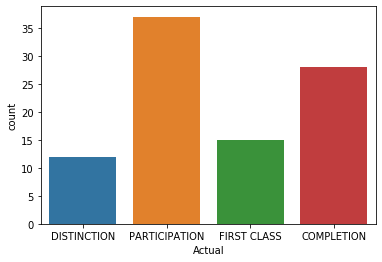

In [34]:
sns.countplot(final['Actual'],label='count')

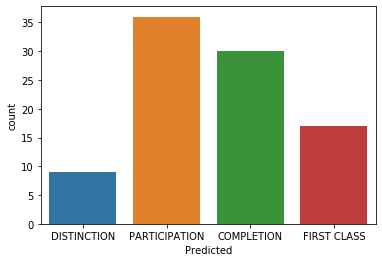

In [35]:
sns.countplot(final['Predicted'],label='count')

## Performance Metrics

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

## Accuracy Score

In [37]:
acc=accuracy_score(y_test,y_pred)

In [38]:
acc

0.7608695652173914

## Confusion Matrix

In [39]:
a=confusion_matrix(y_test,y_pred)

In [40]:
mat=pd.DataFrame(a,columns=['Comp','Dist','FC','Part'],index=['Comp','Dist','FC','Part'])

In [41]:
mat

,Comp,Dist,FC,Part
Comp,21,2,3,2
Dist,2,6,4,0
FC,5,1,9,0
Part,2,0,1,34


## Visualize the Decision Tree

In [42]:
from sklearn import tree

In [43]:
fig=plt.figure(figsize=(50,30))

<Figure size 3600x2160 with 0 Axes>

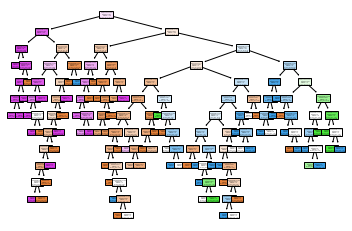

In [44]:
_=tree.plot_tree(z,feature_names=final.Actual,class_names=final.Predicted,filled=True)